In [167]:
import os
import glob
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as pl
import plotly.express as px

In [168]:
warnings.filterwarnings("ignore")

# Merging all the available csv files to single dataframe

In [169]:
df=pd.read_csv("./Nepali_Stock_Market _Data__2012-2020/data_csv.csv")

In [170]:
df.shape

(250901, 21)

In [171]:
df.head()

,S.No,Symbol,Conf.,Open,High,Low,Close,VWAP,Vol,Prev. Close,...,Trans.,Diff,Range,Diff %,Range %,VWAP %,52 Weeks High,52 Weeks Low,180 Days,Date
0,1,ACEDBL,-,114.0,113.0,112.0,113.0,112.83,"1,962",114.0,...,6,-1.0,1.0,-0.88,0.89,0.15,0.0,0.0,NaN,2012-01-01
1,2,ACEDPO,-,188.0,114.0,114.0,114.0,114.00,"10,000",188.0,...,1,-74.0,0.0,-39.36,0.00,0.0,0.0,0.0,NaN,2012-01-01
2,3,ADBL,-,115.0,115.0,113.0,114.0,113.39,"1,111",115.0,...,15,-1.0,2.0,-0.87,1.77,0.54,0.0,0.0,NaN,2012-01-01
3,4,AHPC,-,319.0,319.0,312.0,312.0,318.38,377,319.0,...,17,-7.0,7.0,-2.19,2.24,-2.05,0.0,0.0,NaN,2012-01-01
4,5,ALDBL,-,102.0,101.0,101.0,101.0,101.00,30,102.0,...,3,-1.0,0.0,-0.98,0.00,0.0,0.0,0.0,NaN,2012-01-01


# Checking for types of column data

In [172]:
pd.DataFrame(df.dtypes,columns=["Columns"]).reset_index().rename(columns={"index":"Column name","Columns":"Data Type"})

,Column name,Data Type
0,S.No,int64
1,Symbol,object
2,Conf.,object
3,Open,float64
4,High,float64
5,Low,float64
6,Close,float64
7,VWAP,object
8,Vol,object
9,Prev. Close,float64


# Checking missing values

In [173]:
null_values=df.isnull().sum()
null_values

S.No                  0
Symbol              140
Conf.                 0
Open                  0
High                  0
Low                   0
Close                 0
VWAP                  0
Vol                   0
Prev. Close           0
Turnover              0
Trans.                0
Diff                  0
Range                 0
Diff %                0
Range %               0
VWAP %                0
52 Weeks High         0
52 Weeks Low          0
180 Days         250779
Date                  0
dtype: int64

<AxesSubplot:>

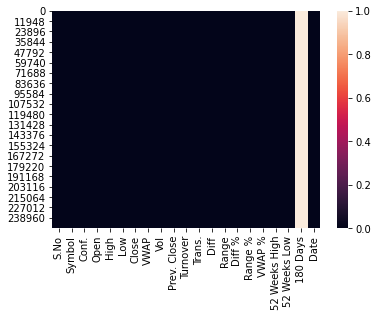

In [174]:
sns.heatmap(df.isnull())

In [175]:
null_values/len(df)

S.No             0.000000
Symbol           0.000558
Conf.            0.000000
Open             0.000000
High             0.000000
Low              0.000000
Close            0.000000
VWAP             0.000000
Vol              0.000000
Prev. Close      0.000000
Turnover         0.000000
Trans.           0.000000
Diff             0.000000
Range            0.000000
Diff %           0.000000
Range %          0.000000
VWAP %           0.000000
52 Weeks High    0.000000
52 Weeks Low     0.000000
180 Days         0.999514
Date             0.000000
dtype: float64

### 99 percent of 180 Days data is missing so we can drop this column

In [176]:
df.drop(columns=["180 Days"],axis=0,inplace=True)

In [177]:
df.describe().style.background_gradient(cmap="Set3")

,S.No,Open,High,Low,Close,Prev. Close,Diff %,Range %
count,250901.000000,250901.000000,250901.000000,250901.000000,250901.000000,250901.000000,250901.000000,250901.000000
mean,70.281685,728.115518,738.121261,719.442406,729.287949,728.147330,0.154513,2.721788
std,44.248010,1589.122378,1604.530323,1577.026589,1591.221102,1589.493687,3.364801,2.592309
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,-100.000000
25%,33.000000,169.000000,171.000000,167.000000,170.000000,169.000000,-1.410000,1.140000
50%,66.000000,350.000000,356.000000,346.000000,351.000000,350.000000,0.000000,2.050000
75%,104.000000,755.000000,768.000000,745.000000,757.000000,755.000000,1.420000,3.740000
max,378.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,412.730000,261.920000


## Removing commas from the price values

In [178]:
def removeComma(value):
    return ('').join(value.split(","))
def removeCommaT(value):
    return int(('').join(value.split(",")))

In [179]:
df['Vol']=df['Vol'].apply(lambda x: removeCommaT(x))
df['VWAP']=df['VWAP'].apply(lambda x: removeComma(x))
df['Turnover']=df['Turnover'].apply(lambda x: removeCommaT(x))

In [180]:
df['Date']=pd.to_datetime(df['Date'])

In [181]:
temp=df['Symbol'].value_counts()[:50]
fig=go.Figure(
    go.Bar(
    x=temp.keys(),
    y=temp.values,
    text=temp.values,
    textposition="inside",
    marker=dict(color=temp.values,
                   colorscale='balance'),
    )
)
fig.update_layout(title="Count of TOP Companies with their Symbols",
                 title_x=.5)
fig.show()

## Company and their symbols with highest Turnovers

In [182]:
temp=df[['Symbol','Turnover','Date']].sort_values(by="Turnover",ascending=False)[:20].reset_index(drop=True)
temp

,Symbol,Turnover,Date
0,EBLPO,1917639392,2019-02-14
1,CIT,1200790365,2016-09-18
2,NABILP,834254801,2014-07-06
3,NIBPO,820124080,2015-01-25
4,NBBPO,757643120,2013-09-01
5,NBBPO,719550000,2014-01-26
6,NIBPO,655439737,2015-01-26
7,GBIME,611228746,2020-01-22
8,EBL,517060689,2016-11-17
9,NBL,457139858,2014-01-19


In [183]:
fig=go.Figure(
    go.Bar(
    x=temp.Symbol,
    y=temp.Turnover,
    text=temp.Symbol,
    textposition="inside",
    marker=dict(color=temp.Turnover,
                   colorscale='balance'),
    )
    )

fig.update_layout(title="Top 20 Highest Turnover Symbols",
                 title_x=.5)
fig.show()

In [184]:
fig=px.scatter(temp,x='Symbol',
              y='Turnover',
               color='Turnover',
               size='Turnover'
              )
fig.update_layout(title="Top 20 Highest Turnover Symbols",
                 title_x=.5)

fig.show()

## Company and their symbols with Lowest Turnovers

In [185]:
temp=df[['Symbol','Turnover','Date']].sort_values(by="Turnover",ascending=True)[:20].reset_index(drop=True)
temp

,Symbol,Turnover,Date
0,NICL,0,2015-08-16
1,JEFL,114,2018-05-07
2,CFCL,122,2018-09-10
3,JEFL,123,2018-03-04
4,KNBL,135,2018-07-23
5,NGPL,146,2018-10-02
6,RLFL,152,2017-12-12
7,RLFL,153,2017-11-29
8,KADBL,196,2018-08-08
9,RHPC,200,2018-11-04


In [186]:
fig=go.Figure(
    go.Bar(
    x=temp.Symbol,
    y=temp.Turnover,
    text=temp.Symbol,
    textposition="inside",
    marker=dict(color=temp.Turnover,
                   colorscale='balance'),
    )
    )

fig.update_layout(title="Top 20 Lowest Turnover Symbols",
                 title_x=.5)
fig.show()

In [187]:
fig=px.scatter(temp,x='Symbol',
              y='Turnover',
               color='Turnover',
               size='Turnover'
              )
fig.update_layout(title="Top 20 Lowest Turnover Symbols",
                 title_x=.5)

fig.show()

In [188]:
temp_df=df[['Open','High','Low','Close','Symbol','Date']]
temp_df=temp_df[temp_df['Date']<"2013"]
temp_df=temp_df[temp_df['Symbol']=="EBL"]
dates=temp_df['Date']
temp_df=temp_df[temp_df.columns[:-1]]
temp_df.head()

,Open,High,Low,Close,Symbol
17,696.0,695.0,681.0,685.0,EBL
92,685.0,714.0,680.0,714.0,EBL
170,714.0,714.0,700.0,700.0,EBL
247,700.0,700.0,680.0,681.0,EBL
316,681.0,702.0,680.0,702.0,EBL


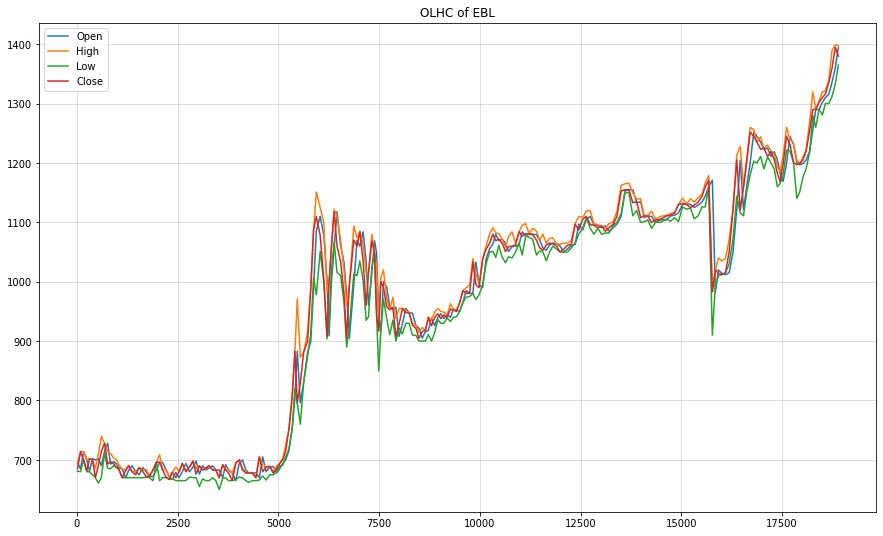

In [189]:
temp_df.plot(figsize=(15,9))
pl.grid(alpha=.5)
pl.title("OLHC of EBL")
pl.show()

In [190]:
fig=px.scatter(temp_df,x='High',
              y='Low',
               color='High',
              size='Low',
              )
fig.update_layout(title=" Scatter plot ratio of High and Low",
                 title_x=.5)
fig.show()

In [191]:
temp=df.iloc[df['Turnover'].sort_values()[-1:].index[0],:]
temp

S.No                              28
Symbol                         EBLPO
Conf.                              -
Open                           265.0
High                           265.0
Low                            265.0
Close                          265.0
VWAP                          265.00
Vol                          7236375
Prev. Close                   1045.0
Turnover                  1917639392
Trans.                             3
Diff                          -780.0
Range                            0.0
Diff %                        -74.64
Range %                          0.0
VWAP %                          -0.0
52 Weeks High                 265.00
52 Weeks Low                    0.00
Date             2019-02-14 00:00:00
Name: 205460, dtype: object

In [192]:
f'{temp.Symbol} recorded with highest Turnover of Rs {temp.Turnover} in {temp.Date}'

'EBLPO recorded with highest Turnover of Rs 1917639392 in 2019-02-14 00:00:00'

# Most Sold Stocks

In [193]:
temp_df=df[['Symbol','Vol','Date']].sort_values(by='Vol',ascending=False)[:20]
temp_df

,Symbol,Vol,Date
205460,EBLPO,7236375,2019-02-14
131885,SEOS,5634564,2017-02-09
131846,NIBSF1,5513600,2017-02-09
221368,SEOS,5256974,2019-07-04
115332,GIMES1,4358585,2016-07-28
131857,NMBSF1,3376500,2017-02-09
54095,TRH,3127045,2014-06-25
115417,SEOS,3125622,2016-07-28
112295,NIBSF1,2961755,2016-06-26
32568,NBBPO,2914012,2013-09-01


In [212]:
fig=go.Figure(
    go.Bar(
    x=temp_df.Symbol,
    y=temp_df.Vol,
    textposition="inside",
    marker=dict(color=temp_df.Vol,
                   colorscale='balance'),
    text=temp_df.Vol,
    )
    )

fig.update_layout(title="Top 20 Highest Recorded Volumes/ Sales",
                 title_x=.5,
                 barmode='stack', xaxis={'categoryorder':'total descending'}
                 )

fig.show()

In [248]:
df['Symbol'].nunique()

522

# Data with open price less than 50

In [249]:
df[df['Open']<50].head(20)

,S.No,Symbol,Conf.,Open,High,Low,Close,VWAP,Vol,Prev. Close,Turnover,Trans.,Diff,Range,Diff %,Range %,VWAP %,52 Weeks High,52 Weeks Low,Date
26,27,ARUN,-,45.0,44.0,43.0,43.0,43.94,660,45.0,29002,11,-2.0,1.0,-4.44,2.33,-2.19,0.0,0.0,2012-01-01
98,21,ARUN,-,43.0,42.0,41.0,42.0,41.40,2300,43.0,95219,18,-1.0,1.0,-2.33,2.44,1.43,0.0,0.0,2012-01-02
176,26,ARUN,-,42.0,43.0,43.0,43.0,43.00,500,42.0,21500,11,1.0,0.0,2.38,0.00,0.0,0.0,0.0,2012-01-03
242,13,NaN,-,0.0,105.0,105.0,105.0,105.00,25000,0.0,2625000,1,105.0,0.0,0.00,0.00,0.0,0.0,0.0,2012-01-04
253,24,ARUN,-,43.0,44.0,44.0,44.0,43.86,440,43.0,19298,6,1.0,0.0,2.33,0.00,0.32,0.0,0.0,2012-01-04
320,16,ARUN,-,44.0,44.0,44.0,44.0,43.86,400,44.0,17544,3,0.0,0.0,0.00,0.00,0.32,0.0,0.0,2012-01-05
392,19,ARUN,-,44.0,44.0,44.0,44.0,43.86,800,44.0,35091,11,0.0,0.0,0.00,0.00,0.31,0.0,0.0,2012-01-08
412,39,NHPC,-,48.0,49.0,48.0,49.0,48.06,403500,48.0,19390480,5,1.0,1.0,2.08,2.08,1.93,0.0,0.0,2012-01-08
466,23,ARUN,-,44.0,44.0,44.0,44.0,43.86,400,44.0,17545,5,0.0,0.0,0.00,0.00,0.31,0.0,0.0,2012-01-09
490,47,NHPC,-,49.0,50.0,47.0,50.0,48.07,648225,49.0,31161321,28,1.0,3.0,2.04,6.38,3.86,0.0,0.0,2012-01-09


# Data with open price more than 10 thousand

In [338]:
df_highO=df[df['Open']>10000].set_index("Date")
df_highO.head()

,S.No,Symbol,Conf.,Open,High,Low,Close,VWAP,Vol,Prev. Close,Turnover,Trans.,Diff,Range,Diff %,Range %,VWAP %,52 Weeks High,52 Weeks Low
Date,,,,,,,,,,,,,,,,,,,
2012-12-23,80,UNL,-,10080.0,9879.0,9682.0,9682.0,9780.50,20,10080.0,195610,2,-398.0,197.0,-3.95,2.03,-1.02,0.0,0.0
2013-01-15,78,UNL,-,10100.0,10100.0,10100.0,10100.0,10100.00,10,10100.0,101000,1,0.0,0.0,0.00,0.00,0.0,0.0,0.0
2013-01-20,70,UNL,-,10100.0,10000.0,10000.0,10000.0,10000.00,30,10100.0,300000,1,-100.0,0.0,-0.99,0.00,0.0,0.0,0.0
2013-02-13,87,UNL,-,10345.0,10400.0,10400.0,10400.0,10400.00,10,10345.0,104000,1,55.0,0.0,0.53,0.00,0.0,0.0,0.0
2013-02-20,88,UNL,-,10400.0,10192.0,10100.0,10100.0,10113.14,70,10400.0,707920,3,-300.0,92.0,-2.88,0.91,-0.13,0.0,0.0


In [296]:
companies=df_highO['Symbol'].unique()
companies

array(['UNL', 'RBCLPO', 'RBCL'], dtype=object)

# here companies UNL BRCLPO and RBCL were recorded with highest Open price

In [283]:
unilever_data=df[df['Symbol']=='UNL'].set_index('Date')
RBCLPO_data=df[df['Symbol']=='RBCLPO'].set_index('Date')
RBCL_data=df[df['Symbol']=='RBCL'].set_index('Date')

In [265]:
unilever_data.shape

(655, 20)

In [266]:
RBCLPO_data.shape

(874, 20)

In [267]:
RBCL_data.shape

(865, 20)

In [253]:
unilever_data.head()

,S.No,Symbol,Conf.,Open,High,Low,Close,VWAP,Vol,Prev. Close,Turnover,Trans.,Diff,Range,Diff %,Range %,VWAP %,52 Weeks High,52 Weeks Low,Date
226,76,UNL,-,6273.0,6150.0,6150.0,6150.0,6150.00,10,6273.0,61500,1,-123.0,0.0,-1.96,0.00,0.0,0.0,0.0,2012-01-03
301,72,UNL,-,6150.0,6273.0,6273.0,6273.0,6273.00,100,6150.0,627300,1,123.0,0.0,2.00,0.00,0.0,0.0,0.0,2012-01-04
370,66,UNL,-,6273.0,6148.0,6148.0,6148.0,6148.00,10,6273.0,61480,1,-125.0,0.0,-1.99,0.00,0.0,0.0,0.0,2012-01-05
748,78,UNL,-,6148.0,6269.0,6148.0,6269.0,6189.00,30,6148.0,185670,3,121.0,121.0,1.97,1.97,1.28,0.0,0.0,2012-01-12
2037,79,UNL,-,6269.0,6144.0,5669.0,5669.0,5999.00,150,6269.0,899850,9,-600.0,475.0,-9.57,8.38,-5.82,0.0,0.0,2012-02-08


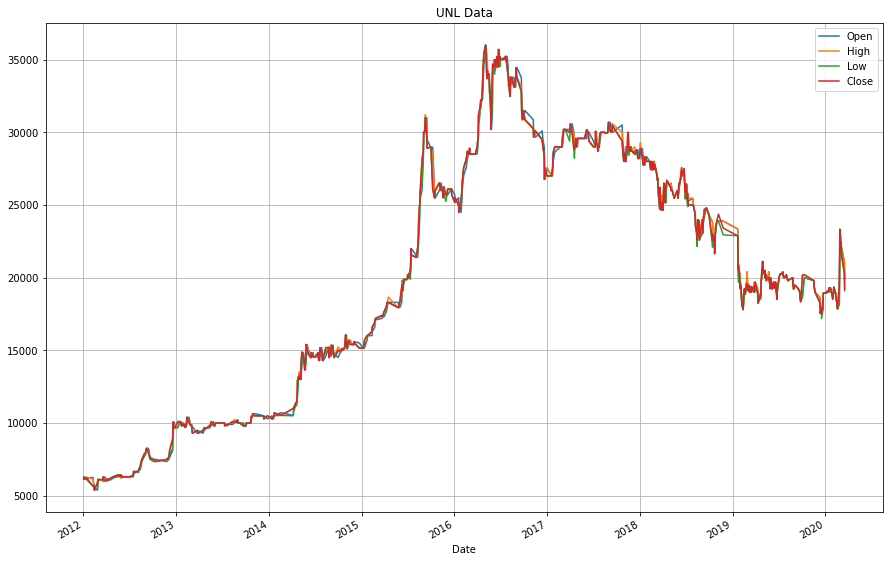

In [284]:
unilever_data[['Open','High','Low','Close']].plot(figsize=(15,10))
pl.grid()
pl.title("UNL Data")
pl.show()

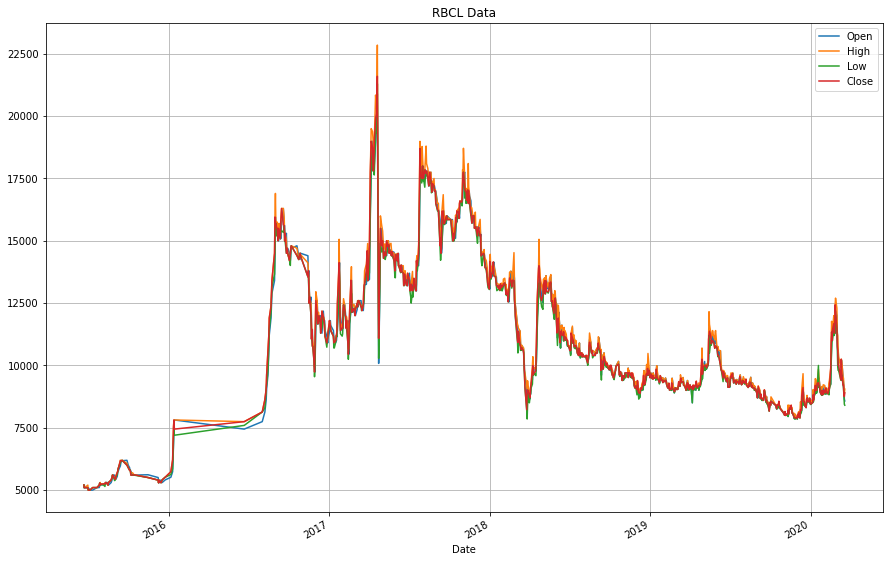

In [285]:
RBCL_data[['Open','High','Low','Close']].plot(figsize=(15,10))
pl.grid()
pl.title("RBCL Data")
pl.show()

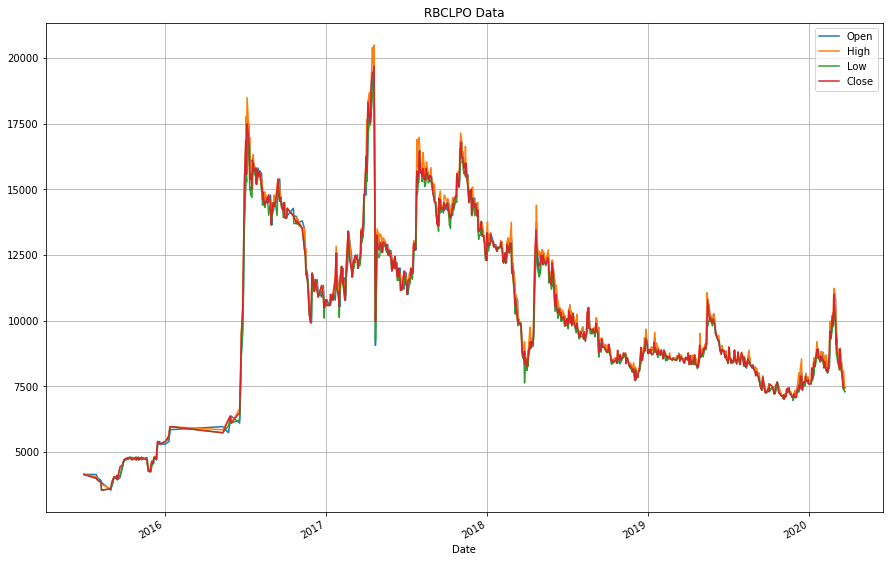

In [286]:
RBCLPO_data[['Open','High','Low','Close']].plot(figsize=(15,10))
pl.grid()
pl.title("RBCLPO Data")
pl.show()

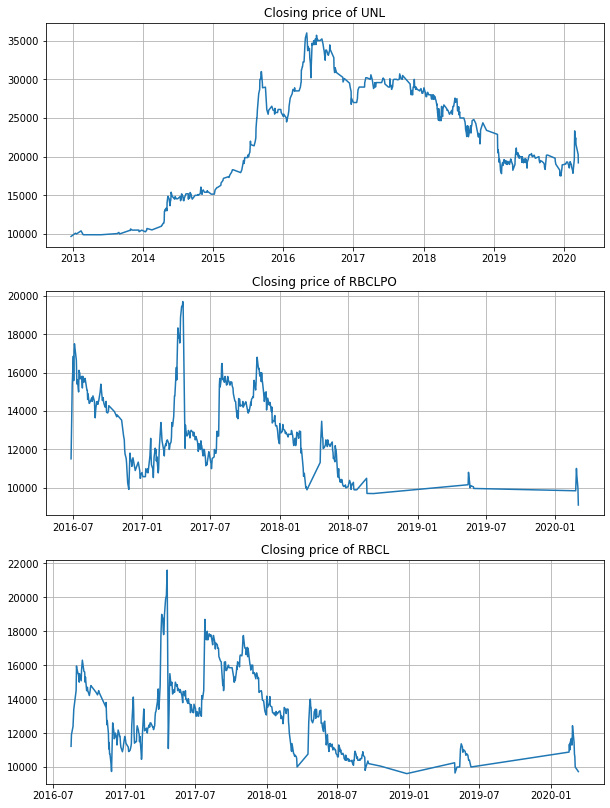

In [340]:
fig,axes=pl.subplots(3,figsize=(10,14))
for comp,axs in zip(companies,axes.ravel()):
    axs.plot(df_highO[df_highO["Symbol"]==comp]["Close"])
    axs.grid()
    axs.set_title(f"Closing price of {comp}")

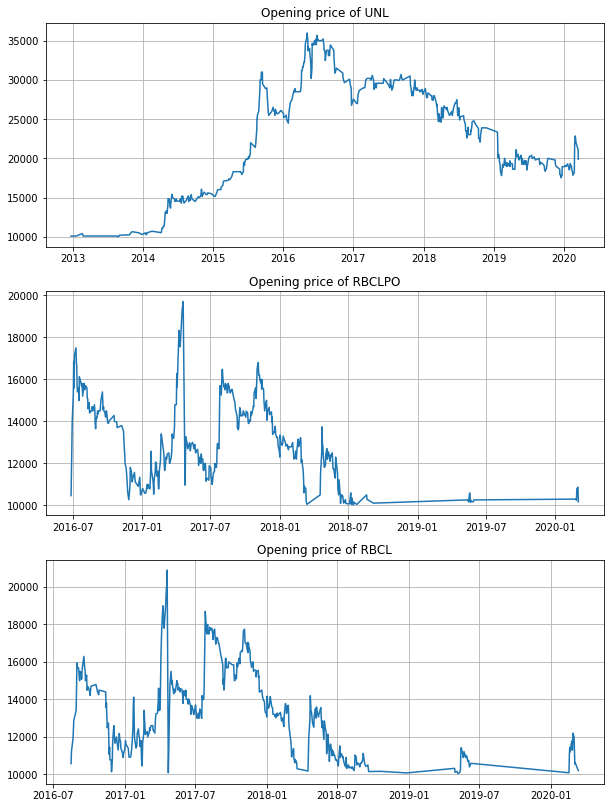

In [342]:
fig,axes=pl.subplots(3,figsize=(10,14))
for comp,axs in zip(companies,axes.ravel()):
    axs.plot(df_highO[df_highO["Symbol"]==comp]["Open"])
    axs.grid()
    axs.set_title(f"Opening price of {comp}")

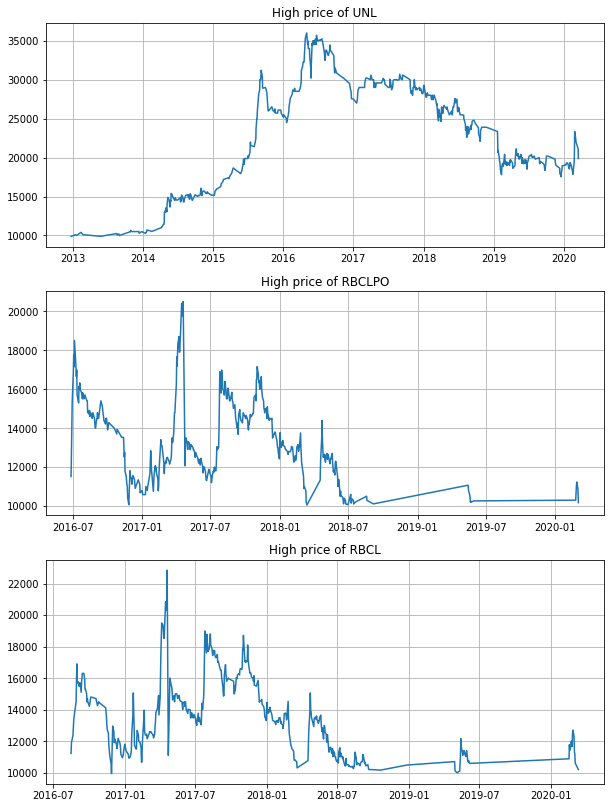

In [343]:
fig,axes=pl.subplots(3,figsize=(10,14))
for comp,axs in zip(companies,axes.ravel()):
    axs.plot(df_highO[df_highO["Symbol"]==comp]["High"])
    axs.grid()
    axs.set_title(f"High price of {comp}")

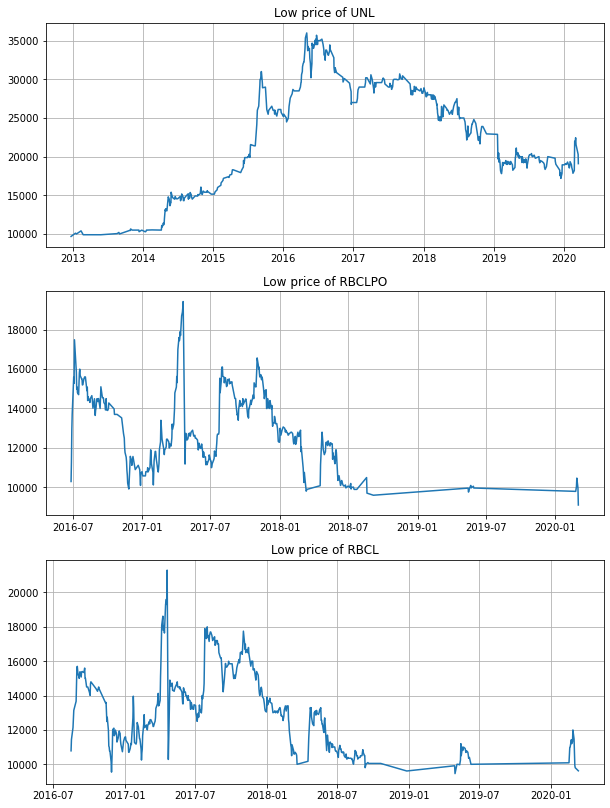

In [344]:
fig,axes=pl.subplots(3,figsize=(10,14))
for comp,axs in zip(companies,axes.ravel()):
    axs.plot(df_highO[df_highO["Symbol"]==comp]["Low"])
    axs.grid()
    axs.set_title(f"Low price of {comp}")

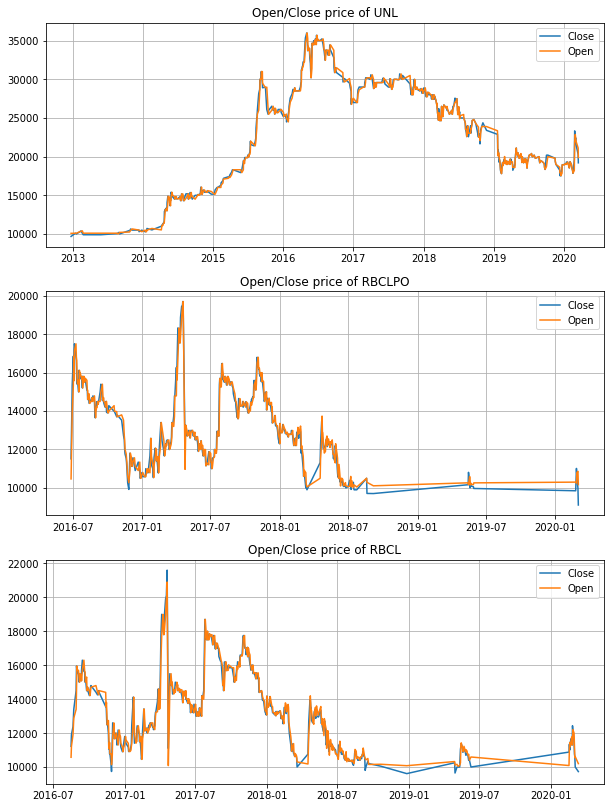

In [353]:
fig,axes=pl.subplots(3,figsize=(10,14))
for comp,axs in zip(companies,axes.ravel()):
    axs.plot(df_highO[df_highO["Symbol"]==comp]["Close"],label="Close")
    axs.plot(df_highO[df_highO["Symbol"]==comp]["Open"],label="Open")
    axs.grid()
    axs.legend()
    axs.set_title(f"Open/Close price of {comp}")

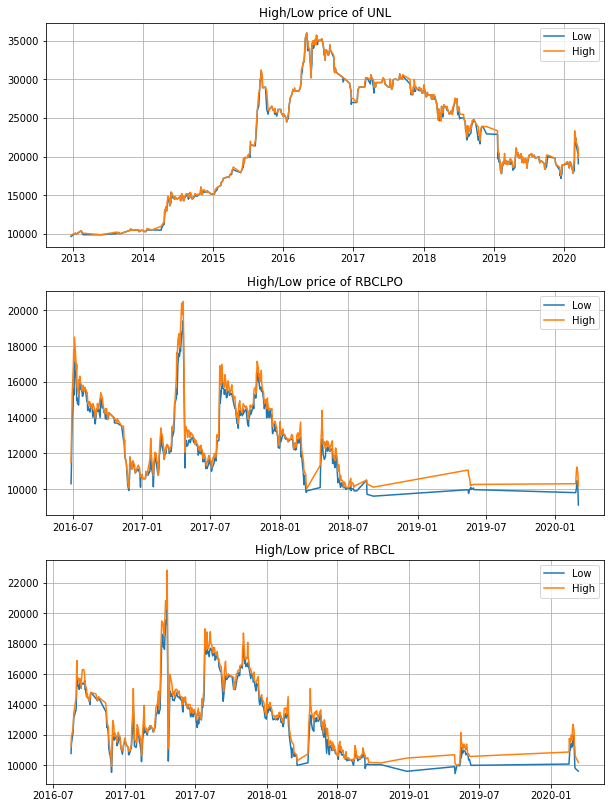

In [354]:
fig,axes=pl.subplots(3,figsize=(10,14))
for comp,axs in zip(companies,axes.ravel()):
    axs.plot(df_highO[df_highO["Symbol"]==comp]["Low"],label="Low")
    axs.plot(df_highO[df_highO["Symbol"]==comp]["High"],label="High")
    axs.grid()
    axs.legend()
    axs.set_title(f"High/Low price of {comp}")

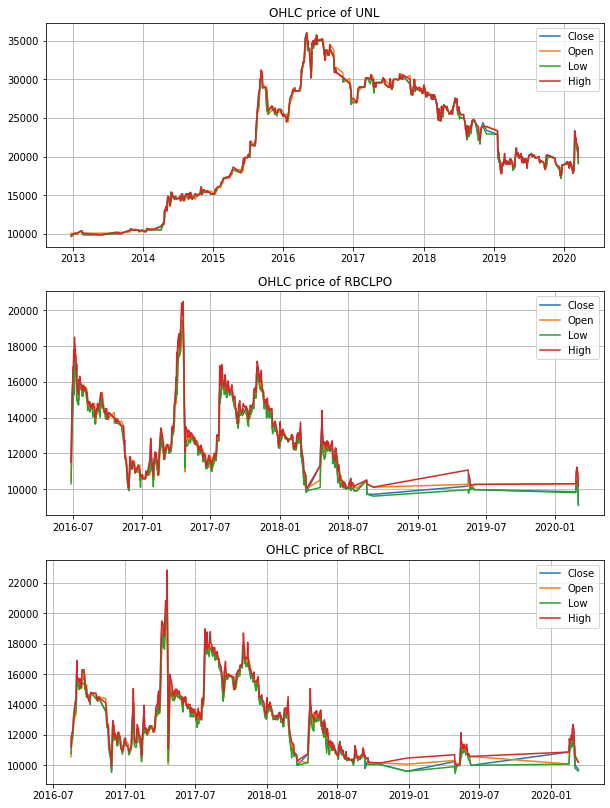

In [355]:
fig,axes=pl.subplots(3,figsize=(10,14))
for comp,axs in zip(companies,axes.ravel()):
    axs.plot(df_highO[df_highO["Symbol"]==comp]["Close"],label="Close")
    axs.plot(df_highO[df_highO["Symbol"]==comp]["Open"],label="Open")
    axs.plot(df_highO[df_highO["Symbol"]==comp]["Low"],label="Low")
    axs.plot(df_highO[df_highO["Symbol"]==comp]["High"],label="High")
    axs.grid()
    axs.legend()
    axs.set_title(f"OHLC price of {comp}")

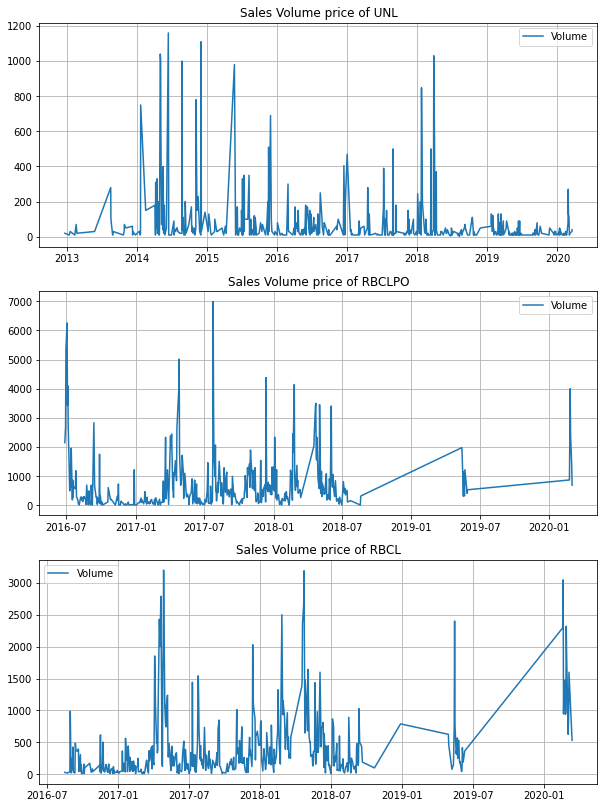

In [396]:
fig,axes=pl.subplots(3,figsize=(10,14))
for comp,axs in zip(companies,axes.ravel()):
    axs.plot(df_highO[df_highO["Symbol"]==comp]["Vol"],label="Volume")
    axs.grid()
    axs.legend()
    axs.set_title(f"Sales Volume price of {comp}")

In [381]:
ma_days = [10, 20, 50]
for ma in ma_days:
    for company in companies:
        column_name = f"MA for {ma} days"
        df_highO[column_name] = df_highO['Close'].rolling(ma).mean()

## Rolling Mean represents how many number of data to take for finding average. Eg:

In [384]:
a=pd.Series(np.arange(10))
a.rolling(5).mean()

0    NaN
1    NaN
2    NaN
3    NaN
4    2.0
5    3.0
6    4.0
7    5.0
8    6.0
9    7.0
dtype: float64

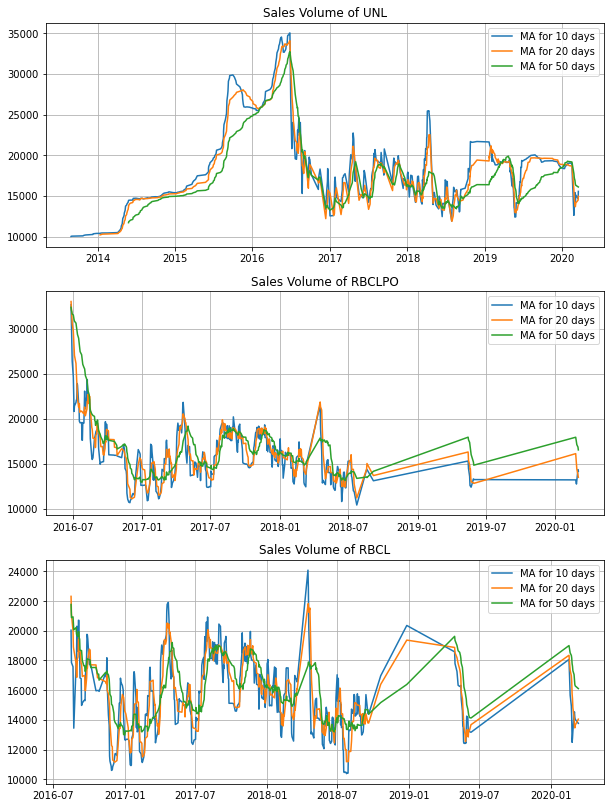

In [370]:
fig,axes=pl.subplots(3,figsize=(10,14))
for comp,axs in zip(companies,axes.ravel()):
    axs.plot(df_highO[df_highO["Symbol"]==comp]["MA for 10 days"],label="MA for 10 days")
    axs.plot(df_highO[df_highO["Symbol"]==comp]["MA for 20 days"],label="MA for 20 days")
    axs.plot(df_highO[df_highO["Symbol"]==comp]["MA for 50 days"],label="MA for 50 days")    
    axs.grid()
    axs.legend()
    axs.set_title(f"Sales Volume of {comp}")

In [389]:
for company in companies:
    df_highO['D_Return'] = df_highO['Close'].pct_change()

### PCT change is by what percentage the value varied from the previous

In [398]:
a=pd.Series(np.random.randint(1,10,10))
print(a)
a.pct_change()

0    7
1    2
2    8
3    6
4    3
5    2
6    1
7    1
8    6
9    7
dtype: int32


0         NaN
1   -0.714286
2    3.000000
3   -0.250000
4   -0.500000
5   -0.333333
6   -0.500000
7    0.000000
8    5.000000
9    0.166667
dtype: float64

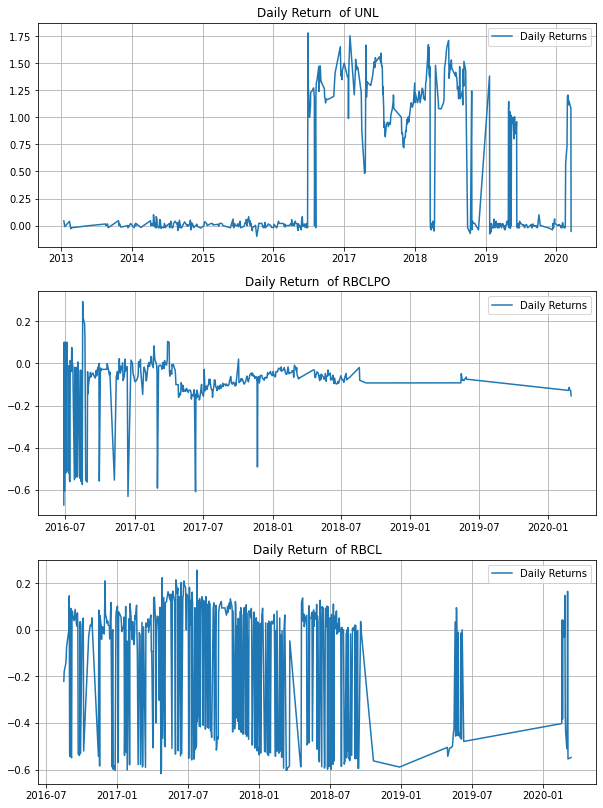

In [390]:
fig,axes=pl.subplots(3,figsize=(10,14))
for comp,axs in zip(companies,axes.ravel()):
    axs.plot(df_highO[df_highO["Symbol"]==comp]["D_Return"],label="Daily Returns")    
    axs.grid()
    axs.legend()
    axs.set_title(f"Daily Return  of {comp}")